# Analysis of Exit Surveys From Employees of the DETE and TAFE

In this project, we'll assume the role of a data analyst and aim to answer the following questions about our dataset:
- Are employees who only worked for institutes for a short time period resigning because they are dissatisfied with their jobs? Does the same thing apply to employees who have been there in the longer term?
- Are younger employees resigning due to their dissatisfaction with their jobs? How about the older employees?

We will be working with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The DETE exit survey data can be found by clicking on this [link](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). However, the original TAFE exit survey data is no longer available. Some minor alterations have been made to the original source data to make them slightly easier to work with, particularly changing the encoding from `cp1252` to `UTF-8`.

## Importing the Data

Firstly, we'll import the relevant libraries and read in the CSV files for the datasets into `pandas`.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

Here is some basic information about the `dete_survey` dataset and its first five rows printed out.

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now, we'll repeat this process for the `tafe_survey` dataset.

In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From the initial observations about the data, we observe that:
- The `dete_survey` contains a coupled of `'Not Stated'` values in some of its columns which are indicative of missing data, but they aren't listed as `NaN` for some reason.
- Both the `dete_surveys` and `tafe_survey` dataframes contain a large number of irrelevant columns that we don't need for our analysis.
- The two dataframes contain many of the same columns, but with different names.
- There are multiple columns that relate to an employee's dissatisfaction with their job and factors influencing their resignations.

## Identifying Missing Values and Dropping Unnnecessary Columns

Let's read in the `dete_survey.csv` file into pandas again, but this time we'll read the `Not Stated` values in as `NaN`.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

Now, we'll drop some columns from each dataframe that won't be used in our analysis, in order to make the dataframes easier to read and navigate.

In [6]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Cleaning Column Names

Next, let's turn out attention to the column names. Although the two dataframes contain many of the same columns, they are named differently.

Because we eventually wish to combined the two datasets, it is necessary to standardise the column names. We can use the `DataFrame.columns` attribute together with vectorised string methods to update all the column names simultaneously.

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns \
                                            .str.lower() \
                                            .str.strip() \
                                            .str.replace(' ', '_')

In [8]:
tafe_survey_updated.rename({'Record ID': 'id', 
                            'CESSATION YEAR': 'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender.What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                            }, axis=1, inplace=True)

Let's quickly inspect the current state of the dataframes to ensure that the changes are as expected.

In [9]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filtering the Data

If we observe the unique values in the `separationtype` columns in each each dataframe, we'll notice that there are quite a few different separation types. For our purposes, we'll only analyse survey respondents who *resigned*. That is, their separation type contains the string `'Resignation'`.

Note that the `dete_survey_updated` dataframe contains multiple separation types containnig the string `'Resignation'`:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We will have to account for each one of these variations to ensure we don't unintentionally dispose of any relevant data.

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] \
                                            .str.contains('Resignation')].copy()

In [14]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## Verifying the Data

We need to verify our data to ensure that it makes practical sense as a preventative measure of completing a useless data analysis project due to bad data. For our dataset, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

- As the `cease_date` is the last year of a person's employment and the `dete_start_date` is the person's first year of employment, it would be illogical to have years after the current date.
- Considering the fact most people in this field commence work in their 20s, it is highly unlikely that the `dete_start_date` would be before the year 1940 for any person.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [15]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations['cease_date'] = dete_resignations['cease_date'] \
                                                .str.split(pat='/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [17]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [18]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

After cleaning up the values in the `cease_date` column of the `dete_resignations` dataframe, we can verify that:
- There aren't any noticeable issues with the years in either dataframe
- The years in each dataframe don't quite span the same number of years

## Creating a New Column

In the HR sector, the length of time an employee spends at a workplace is commonly known as their *years of service*. The `tafe_resignations` dataframe already has a 'service' column which we renamed to `institute_service`. To analyse both surveys together, we will create a corresponding `institute_service` column in `dete_resignations`.

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] \
                                            - dete_resignations['dete_start_date']

In [21]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identifying Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

In [22]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    return True

We will create a new column named `dissatisfied` in both the `tafe_resignations` and `dete_resignations` dataframes to store the results of applying the function defined above on all the observations.

In [25]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] \
                                                                                                .applymap(update_vals).any(axis=1, skipna=False)

In [26]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                      'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                                                      'work_location', 'employment_conditions', 'work_life_balance', 'workload']] \
                                                 .applymap(update_vals).any(axis=1, skipna=False) 

Before moving on to the next task, it is good practice to create a copies of the results in order to avoid the *SettingWithCopy* warning which while still enables the code to function, will overwrite the current state of our dataframes.

In [27]:
dete_resignations_up = dete_resignations.copy()

In [28]:
tafe_resignations_up = tafe_resignations.copy()

## Combining the Data

We will now add a new column named `institute` to each dataframe in order to easily distinguish between data from the two tables, before combining the two dataframes into a single one.

In [29]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [30]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [31]:
combined.notnull().sum().value_counts()

311    18
332    12
651     3
290     2
340     2
635     1
9       1
3       1
7       1
8       1
265     1
643     1
271     1
597     1
596     1
598     1
283     1
32      1
161     1
302     1
563     1
0       1
dtype: int64

There are still some irrelevant columns remaining in our dataset that we don't actually need for this particular analysis. We will drop any remaining columns that have less than 500 non-null values.

In [32]:
combined_updated = combined.dropna(thresh=500, axis=1)

## Cleaning the Service Column

We've now combined out dataframes but before commencing our analysis, we still have to clean up the `institute_service` columns because it contains values in various different forms. Although most are formatted as a single float number, there are a few that specify a number range as a string.

In [33]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In order to analyse our data, we will convert the numbers in this column into categories based on the number of years they have worked at a company. We will use the definitions specified in this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), as follows:
- New: Less than 4 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [34]:
combined['institute_service'] = combined['institute_service'].astype(str).str.extract('(\d+)')
combined['institute_service'] = combined['institute_service'].astype(float)

In [35]:
combined['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [36]:
def map_career_stage(val):
    if val < 3:
        return 'New'
    elif 3 <= val < 7:
        return 'Experienced'
    elif 7 <= val < 11:
        return 'Established'
    elif pd.isnull(val):
        return np.nan
    return 'Veteran'

combined['service_cat'] = combined['institute_service'].apply(map_career_stage)

In [37]:
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

We will now commence our initial analysis of employee dissatifaction. Recall that the `dissatisfied` column consists of Boolean values. Let's count the number of `True` and `False` values `dissatisfied` column, whilst also including the number of missing values.

In [38]:
combined['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

Now, we want to replace the missing values in the `dissatisfied` column with the value that occurs the most frequently in this column.

In [41]:
combined['dissatisfied'].fillna(True, inplace=True)

Finally, we want to calculate the percentage of dissatisfied employees in each `service_cat` group.

In [46]:
combined_pivot = combined.pivot_table(index='service_cat', values='dissatisfied')
combined_pivot

,dissatisfied
service_cat,
Established,0.774194
Experienced,0.581395
New,0.476684
Veteran,0.808824


Here's how the bar plot of these results look like:

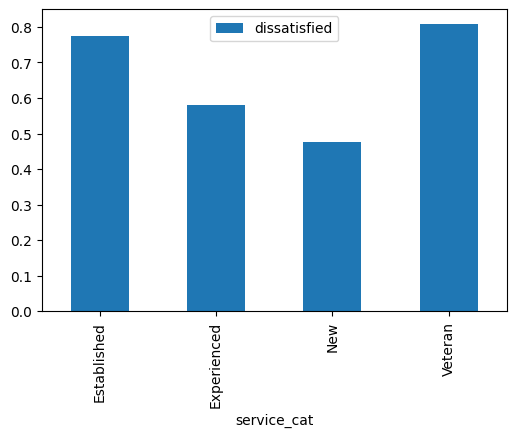

In [50]:
%matplotlib inline
combined_pivot.plot(kind='bar')

From the plot, we observe that the longer an employee has worked at a particular company, the more likely they are to become dissatisfied with their job. This makes sense because doing the same job in the long run is likely to become boring for most people.